# Visualising Well Data Coverage Using Matplotlib
**Created by:** Andy McDonald

This notebook illustrates how you can visualise data extent for multiple wells.  
**Data Used:** Volve Dataset  
**Medium Article:** https://andymcdonaldgeo.medium.com/visualising-well-data-coverage-using-matplotlib-f30591c89754

Exploratory Data Analysis (EDA) is an integral part of Data Science. The same is true for the petrophysical domain and can often be referred to as the Log QC or data review stage of a project. It is at this stage that we begin to go through the data in detail and identify what data we really have, where we have it and what is the quality of the gathered data.  
  
A significant portion of the time that we spend (in some cases up to 90%! - Kohlleffel, 2015) working with well log data is spent trying to understand it and wrangle it into a state that is fit for interpretation. The remaining 10% is when we can get down to the business of carrying out the petrophysical interpretation. This can vary depending on the initial state of the project being worked on.  
  
At the QC stage, we often we find ourselves with multiple input files, random curve names, missing data and extra curves that have no immediate use. This can lead to confusion and frustration, especially when working with multiple tools and vintage datasets. In cases where we have missing data, we need to identify it and determine the best way to handle it. This can be difficult to do by looking at single LAS files in a text editor, but it can be made easier using software. One such method is by using Python, a common and popular programming language.

## Loading the Data and Libraries

As with any Python project we need to load in the required data and libraries. For this notebook we will be using pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/VolveWells.csv')
data

,WELL,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED
0,15/9-F-1 C,145.9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-1 C,146.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-1 C,146.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-1 C,146.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-1 C,146.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
66838,15/9-F-7,1082.9516,NaN,NaN,NaN,12.25,NaN,NaN,NaN,NaN,NaN,NaN
66839,15/9-F-7,1083.1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66840,15/9-F-7,1083.2564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66841,15/9-F-7,1083.4088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.head()

,WELL,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED
0,15/9-F-1 C,145.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-1 C,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-1 C,146.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-1 C,146.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-1 C,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From a first glance, we can see that we have 12 columns in our dataset. The first column is the Well, followed by the Depth curve, which is subsequently followed by each of the logging curves.  
  
We can see what wells we have in our dataset by using a simple for loop. This provides a nicely formatted view.

In [4]:
for well in data['WELL'].unique():
    print(well)

15/9-F-1 C
15/9-F-4
15/9-F-7


## Data Preparation

In order for our plot to work as intended, we need to modify the column order of our dataset. This can be achieved by first creating a list of the columns in the order that we want.

In [5]:
plot_cols = ['WELL', 'DEPTH', 'CALI', 'BS', 'GR', 'NEU', 'DEN', 'PEF', 'RDEP', 'RMED', 'AC', 'ACS']

Then we can replace the existing dataframe with the new column order by passing the list directly into the dataframe:

In [6]:
data = data[plot_cols]

In [7]:
data.head()

,WELL,DEPTH,CALI,BS,GR,NEU,DEN,PEF,RDEP,RMED,AC,ACS
0,15/9-F-1 C,145.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-1 C,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-1 C,146.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-1 C,146.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-1 C,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The next step involves creating a copy of our dataframe. This will allow us to keep the original dataframe for further work later in a project.

In [8]:
data_nan = data.copy()

In places where we have a real value we will assign it a number which will be dependent on its position in the dataframe. In places where we have a NaN (Not a Number) value, we are going to give it a value of number - 1. This will allow us to shade between one number and another whilst using a single subplot for each well. This keeps things simple and negates the need for creating subplots for each curve in each well.

In [9]:
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works

CALI 0
BS 1
GR 2
NEU 3
DEN 4
PEF 5
RDEP 6
RMED 7
AC 8
ACS 9


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30164\456162579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_nan[col].replace(0, num, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30164\456162579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [10]:
data_nan.describe()

,DEPTH,CALI,BS,GR,NEU,DEN,PEF,RDEP,RMED,AC,ACS
count,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000
mean,1915.232292,0.225304,1.983573,2.974732,3.225035,4.223479,5.223479,6.722813,7.723157,8.072034,9.063477
std,1108.591492,0.417786,0.127110,0.156940,0.417608,0.416580,0.416580,0.447613,0.447441,0.258547,0.243821
min,145.900000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
25%,910.546200,0.000000,2.000000,3.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
50%,1850.965600,0.000000,2.000000,3.000000,3.000000,4.000000,5.000000,7.000000,8.000000,8.000000,9.000000
75%,2859.950000,0.000000,2.000000,3.000000,3.000000,4.000000,5.000000,7.000000,8.000000,8.000000,9.000000
max,4093.900000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000


## Plotting the Data
Now we have come to the plotting stage. In order for each well to plot in a separate subplot, we have to group the dataframe by the well name:

In [11]:
grouped = data_nan.groupby('WELL')

We use ax.fillbetweenx() to fill between our two values for each curve that we set up earlier. For example, CALI has two values to indicate data presence: 1 when there is a real value and 0 when there is a NaN. Similarly, GR has two values: 3 when there is real data and 2 when there is a NaN.

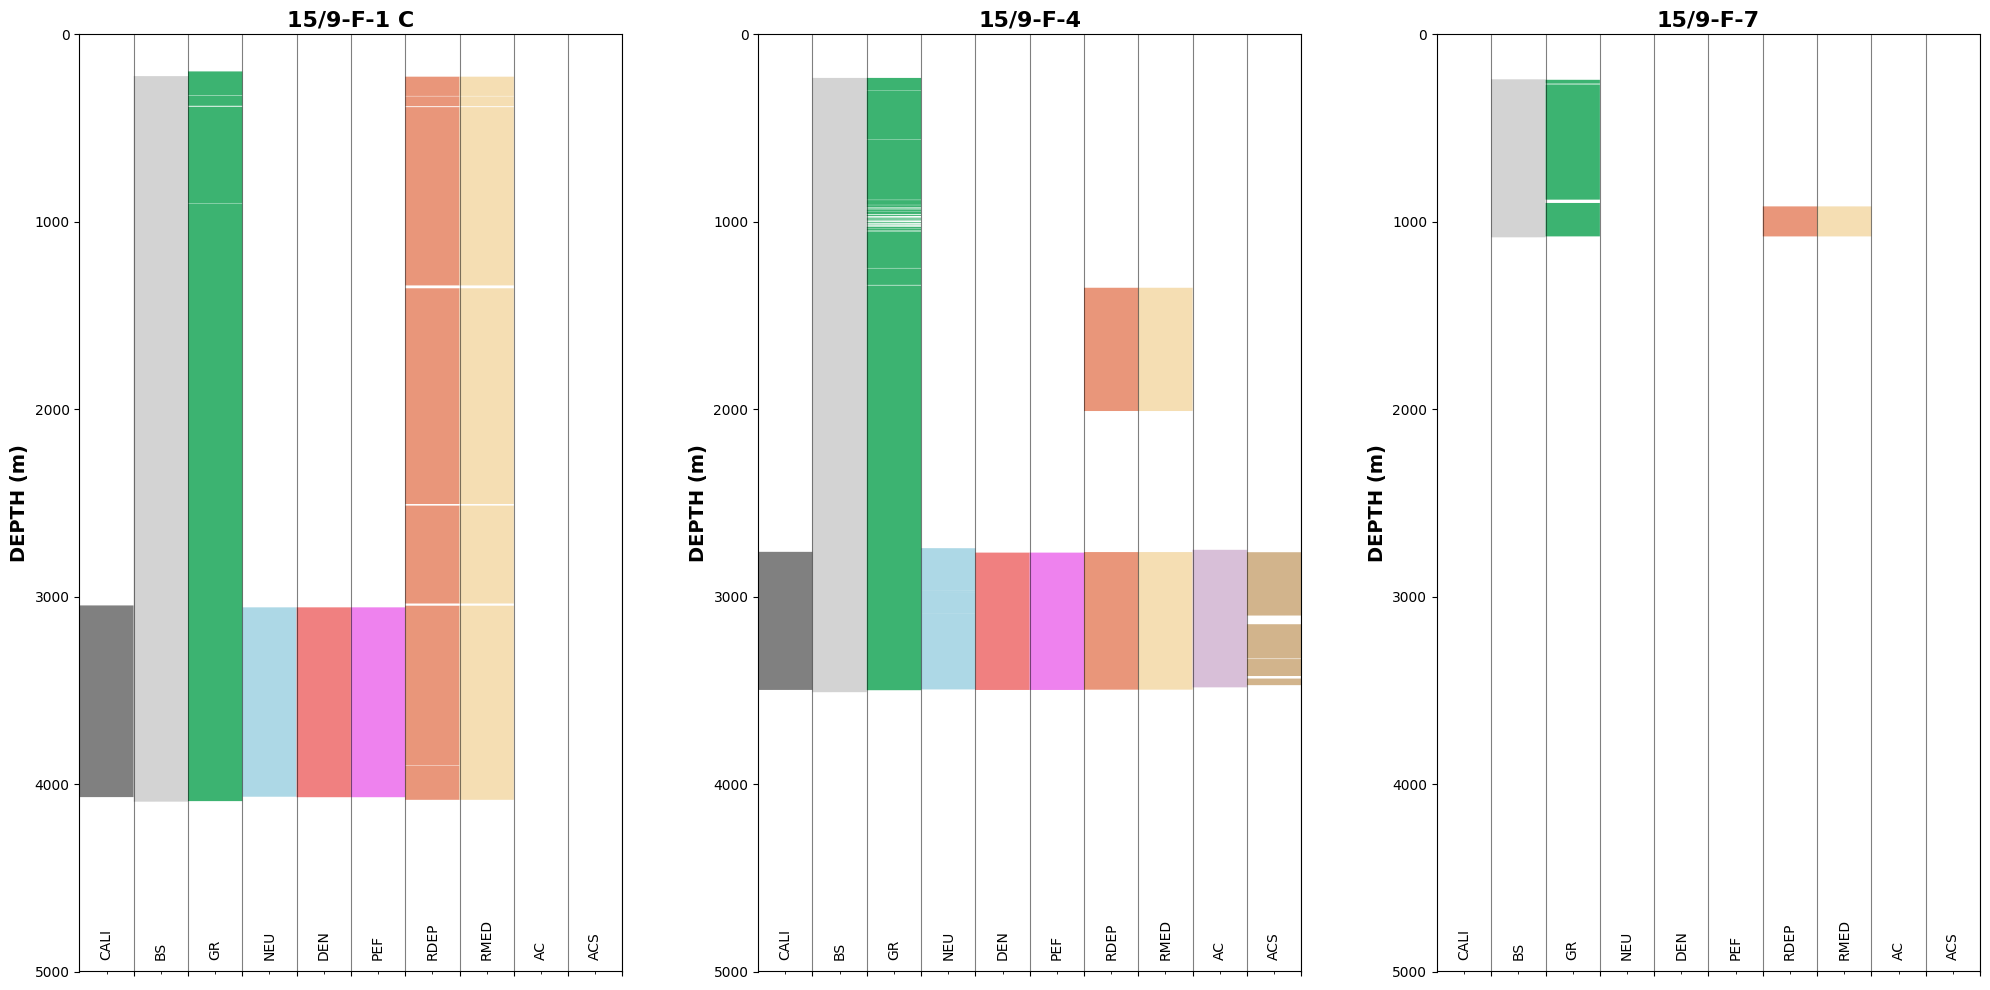

In [12]:
#Setup the labels we want to display on the x-axis
labels = ['CALI', 'BS', 'GR', 'NEU', 'DEN', 'PEF', 'RDEP', 'RMED', 'AC', 'ACS']

#Setup the figure and the subplots
fig, axs = plt.subplots(1, 3, figsize=(20,10))

#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,9)
    
    #Setup the depth range
    ax.set_ylim(5000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    ax.fill_betweenx(df.DEPTH, 0, df.CALI, facecolor='grey')
    ax.fill_betweenx(df.DEPTH, 1, df.BS, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH, 2, df.GR, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH, 3, df.NEU, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH, 4, df.DEN, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH, 5, df.PEF, facecolor='violet')
    ax.fill_betweenx(df.DEPTH, 6, df.RDEP, facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH, 7, df.RMED, facecolor='wheat')
    ax.fill_betweenx(df.DEPTH, 8, df.AC, facecolor='thistle')
    ax.fill_betweenx(df.DEPTH, 9, df.ACS, facecolor='tan')
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 , 7.5, 8.5, 9.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')

plt.savefig('missingdata.png')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()


From this plot we can determine:  
**15/9-F-1 C**
* Minor gaps in the gamma ray and resistivity curves. As the gaps appear at same position on both resistivity curves we can make an initial assumption that they may be related to casing shoes. Further investigation would be needed to confirm this.
* Nuclear curves (DEN, NEU, PEF) and the caliper are only run over a short section, possibly indicating the zone of interest.
* No acoustic curves (AC and ACS)

**15/9-F-4**
* Contains all available curves, with the majority over a small section towards the bottom of the well. 
* There are multiple gaps in the gamma ray (GR) and acoustic shear (ACS) curves. Could be tool related. Further investigation would reveal the cause.

**15/9-F-7**
* Minimal amount of data present over a short and shallow section.
* Only bitsize, gamma ray and resistivity measurements presents.
* Could potentially be caused by a tool failure or issues encountered whilst drilling. This information could be confirmed by reviewing the End of Well Reports, if they are available.